# Проект: Статистический анализ данных

# Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки

    - абонентская плата отсутствует;
    
    - стоимость одной минуты поездки — 8 рублей;
    
    - стоимость старта (начала поездки) — 50 рублей;
    
- с подпиской Ultra

    - абонентская плата — 199 рублей в месяц;
    
    - стоимость одной минуты поездки — 6 рублей;
    
    - стоимость старта — бесплатно.

# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**

- user_id - уникальный идентификатор пользователя;

- name - имя пользователя;

- age - возраст;

- city - город;

- subscription_type - тип подписки (free, ultra).


**Поездки — rides_go.csv**

- user_id - уникальный идентификатор пользователя;

- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);

- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;

- date - дата совершения поездки.


**Подписки — subscriptions_go.csv**

- subscription_type - тип подписки;

- minute_price - стоимость одной минуты поездки по данной подписке;

- start_ride_price - стоимость начала поездки;

- subscription_fee - стоимость ежемесячного платежа.


# Оглавление

- [Описание проекта](#Описание-проекта)
- [Описание данных](#Описание-данных)
- [Оглавление](#Оглавление)
- [Выполнению проекта](#Выполнению-проекта)
    - [Этап 1. Загрузка и изучение данных](#Этап-1.-Загрузка-и-изучение-данных)
        - [Подключим библиотеки.](#Подключим-библиотеки.)
        - [Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.](#Загрузим-данные-из-csv-файла-в-датафрейм-c-помощью-библиотеки-pandas.)
        - [Изучим общую информацию о полученном датафрейме.](#Изучим-общую-информацию-о-полученном-датафрейме.)
    - [Этап 2. Предобработка данных](#Этап-2.-Предобработка-данных)
        - [Приведение столба date к типу даты pandas.](#Приведение-столба-date-к-типу-даты-pandas.)
        - [Создадим новый столбец с номером месяца на основе столбца date.](#Создадим-новый-столбец-с-номером-месяца-на-основе-столбца-date.)
        - [Проверим наличие пропущенных значений и дубликатов в датафреймах.](#Проверим-наличие-пропущенных-значений-и-дубликатов-в-датафреймах.)
        - [Обработаем аномальные значения.](#Обработаем-аномальные-значения.)
        - [Вывод: Предобработка данных](#Вывод:-Предобработка-данных)
    - [Этап 3. Исследовательский анализ данных](#Этап-3.-Исследовательский-анализ-данных)
        - [Частота встречаемости городов у пользователей](#Частота-встречаемости-городов-у-пользователей)
        - [Соотношение пользователей с подпиской и без подписки](#Соотношение-пользователей-с-подпиской-и-без-подписки)
        - [Соотношение пользователей по возрастам](#Соотношение-пользователей-по-возрастам)
        - [Расстояние, которое пользователь преодолел за одну поездку](#Расстояние,-которое-пользователь-преодолел-за-одну-поездку)
        - [Продолжительность поездок](#Продолжительность-поездок)
    - [Этап 4. Объединение данных](#Этап-4.-Объединение-данных)
        - [Объединеним данные о пользователях, поездках и подписках в один датафрейм](#Объединение-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм)
        - [Создадим еще два датафрейма: с данными о пользователях с подпиской/без подписки](#Создадим-еще-два-датафрейма:-с-данными-о-пользователях-с-подпиской/без-подписки)
        - [Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий](#Визуализируем-информацию-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий)
        - [Вывод: объединение данных](#Вывод:-объединение-данных)
    - [Этап 5. Подсчёт выручки](#Этап-5.-Подсчёт-выручки)
        - [Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.](#Создадим-датафрейм-с-агрегированными-данными-о-поездках-на-основе-датафрейма-с-объединёнными-данными.-Найдем-суммарное-расстояние,-количество-поездок-и-суммарное-время-для-каждого-пользователя-за-каждый-месяц.)
        - [Вывод: подсчёт выручки](#Вывод:-подсчёт-выручки)
    - [Этап 6. Проверка гипотез](#Этап-6.-Проверка-гипотез)
        - [Гипотеза №1. Пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи без подписки.](#Гипотеза-№1.-Пользователи-с-подпиской-тратят-в-среднем-больше-времени-на-поездки,-чем-пользователи-без-подписки.)
        - [Гипотеза №2. Пользователи в среднее проезжают расстояние меньше 3130 метров.](#Гипотеза-№2.-Пользователи-в-среднее-проезжают-расстояние-меньше-3130-метров.)
        - [Гипотеза №3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.](#Гипотеза-№3.-Помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки.)
        - [Гипотеза №4. Количество обращений в техподдержку значимо снизилось после технического обновления на стороне сервера приложения](#Гипотеза-№4.-Количество-обращений-в-техподдержку-значимо-снизилось-после-технического-обновления-на-стороне-сервера-приложения)
        - [Вывод: Проверка гипотез](#Вывод:-Проверка-гипотез)
    - [Общий Вывод](#Общий-Вывод)

# Выполнению проекта

## Этап 1. Загрузка и изучение данных

### Подключим библиотеки.

In [1]:
# Библиотека для работы с данными
import pandas as pd

# Библиотека для создания графиков
import matplotlib.pyplot as plt

# Библиотека для создания статистических графиков
import seaborn

# Библиотека для научных вычислений
import numpy as np

# Модуль stats из библиотеки scipy для работы со статистическими методами
from scipy import stats

### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [2]:
try:
    df_users_go = pd.read_csv('/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')
except:
    df_users_go = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/subscriptions_go.csv', sep = ',')

# Установка опции для отображения всех столбцов
pd.options.display.max_columns = None

Для последующей проверки процента очищенных данных посчитаем количество строк в DataFrame

In [3]:
#  Количество строк до обработки
initial_row_count_df_users_go = df_users_go.shape[0]
print(f'Количество строк до обработки таблицы users_go: {initial_row_count_df_users_go}')

initial_row_count_df_rides_go = df_rides_go.shape[0]
print(f'Количество строк до обработки таблицы rides_go: {initial_row_count_df_rides_go}')

initial_row_count_df_subscriptions_go = df_subscriptions_go.shape[0]
print(f'Количество строк до обработки таблицы subscriptions_go: {initial_row_count_df_subscriptions_go}')

Количество строк до обработки таблицы users_go: 1565
Количество строк до обработки таблицы rides_go: 18068
Количество строк до обработки таблицы subscriptions_go: 2


### Изучим общую информацию о полученном датафрейме.

#### Пользователи — users_go.csv

In [4]:
df_users_go.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


#### Поездки — rides_go.csv

In [6]:
df_rides_go.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


#### Подписки — subscriptions_go.csv

In [8]:
df_subscriptions_go.head(15)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


#### ВЫВОД:

**Пропущенные значения**

Пропущенные значения в колонках отсутствуют.

**Типы данных**

В датафрейме rides_go, в колонке date, необходимо заменить тип данных.

**Наблюдения** 

Уникальный идентификатор пользователя user_id является общим столбцом в данных о пользователях и поездках, что позволяет объединить данные для дальнейшего анализа.

**Данные готовы к проведению этапа предобработки.**

## Этап 2. Предобработка данных

### Приведение столба date к типу даты pandas.

In [10]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Преобразуем тип данных столбца date.

In [11]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'], format='%Y.%m.%d')
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [12]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создадим новый столбец с номером месяца на основе столбца date.

In [13]:
df_rides_go['month_date'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверим наличие пропущенных значений и дубликатов в датафреймах. 

**Поиск и удаление пропущенных значений**

Определим в каких столбцах есть пропуски

In [14]:
df_users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
df_rides_go.isna().sum()

user_id       0
distance      0
duration      0
date          0
month_date    0
dtype: int64

In [16]:
df_subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенные значения в таблицах отсутствуют

**Обработка дубликатов**

Проверим наличие явных дубликатов

In [17]:
print(f'Количество явных дубликатов в df_users_go: {df_users_go.duplicated().sum()}')
print(f'Количество явных дубликатов в df_rides_go: {df_rides_go.duplicated().sum()}')
print(f'Количество явных дубликатов в df_subscriptions_go: {df_subscriptions_go.duplicated().sum()}')

Количество явных дубликатов в df_users_go: 31
Количество явных дубликатов в df_rides_go: 0
Количество явных дубликатов в df_subscriptions_go: 0


Выведем список явных дубликатов в df_users_go.

In [18]:
df_users_go.loc[df_users_go.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Удалим список явных дубликатов в df_users_go.

In [19]:
df_users_go = df_users_go.drop_duplicates().reset_index(drop=True)

**Вывод:**

В таблице users_go  было выявлено 31 явный дубликат, который успешно удалён, оставив только первые встретившиеся строки.

### Обработаем аномальные значения. 

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Рассмотрим данные в каждой колонке по отдельности.

#### Рассмотрим данные в датафрейме df_users_go.

In [20]:
df_users_go.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**user_id**

In [21]:
print(f'Количество аномальных значений user_id в датафрейме "df_users_go": {df_users_go["user_id"].count() - df_users_go["user_id"].nunique()}')

Количество аномальных значений user_id в датафрейме "df_users_go": 0


**name**

In [22]:
print(f'Аномальные значения name в датафрейме "df_users_go"')
df_users_go['name'].unique()

Аномальные значения name в датафрейме "df_users_go"


array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Аномальные значения name в датафрейме "df_users_go" не выявлены.

**age**

In [23]:
print(f'Аномальные значения age в датафрейме "df_users_go"')
df_users_go['age'].unique()

Аномальные значения age в датафрейме "df_users_go"


array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int64)

Аномальные значения age в датафрейме "df_users_go" не выявлены.

**city**

In [24]:
print(f'Аномальные значения city в датафрейме "df_users_go"')
df_users_go['city'].unique()

Аномальные значения city в датафрейме "df_users_go"


array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Аномальные значения city в датафрейме "df_users_go" не выявлены.

**subscription_type**

In [25]:
print(f'Аномальные значения subscription_type в датафрейме "df_users_go"')
df_users_go['subscription_type'].unique()

Аномальные значения subscription_type в датафрейме "df_users_go"


array(['ultra', 'free'], dtype=object)

Аномальные значения subscription_type в датафрейме "df_users_go" не выявлены.

#### Рассмотрим данные в датафрейме df_rides_go.

In [26]:
df_rides_go.head(15)

,user_id,distance,duration,date,month_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


**month_date**

In [27]:
print(f'Аномальные значения month_date в датафрейме "df_rides_go"')
sorted(df_rides_go['month_date'].unique())

Аномальные значения month_date в датафрейме "df_rides_go"


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Аномальные значения month_date  в датафрейме "df_rides_go" не выявлены.

**date**

Проверим Аномальные значения года, в колонке date, в датафрейме "df_rides_go"

In [28]:
print(df_rides_go['date'].dt.year.unique())

[2021]


Проверим Аномальные значения дней, в колонке date, в датафрейме "df_rides_go"

In [29]:
print(sorted(df_rides_go['date'].dt.day.unique()))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Аномальные значения date в датафрейме "df_rides_go" не выявлены.

**distance**

18068

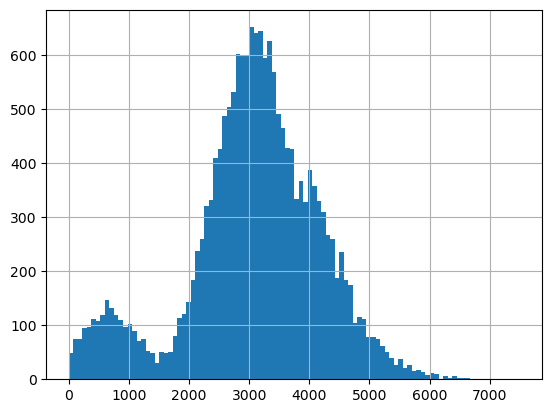

In [30]:
distance_old_count = (df_rides_go['distance'].count())
df_rides_go['distance'].hist(bins=100, range=(0, 7500));
distance_old_count


Из графика мы видим что аномальных значений, всплесков не выявлено. Так же мы видим, что на графике присутствуют два пика:

1. От 0.1 км. до 1.5 км.

2. От 2 км. до 5 км.

На данном графике имеет смысл удаление расстояние более 6.5 км.

In [31]:
len(df_rides_go.query('distance > 6000'))

46

In [32]:
df_rides_go = df_rides_go.loc[df_rides_go['distance'] <= 6000]

In [33]:
distance_new_count = (df_rides_go['distance'].count())
distance_new_count 

18022

In [34]:
dropped_distance_count = ((distance_old_count - distance_new_count) / distance_old_count) * 100
print(f'Процент отброшенных данных: {dropped_distance_count:.2f}% ')

Процент отброшенных данных: 0.25% 


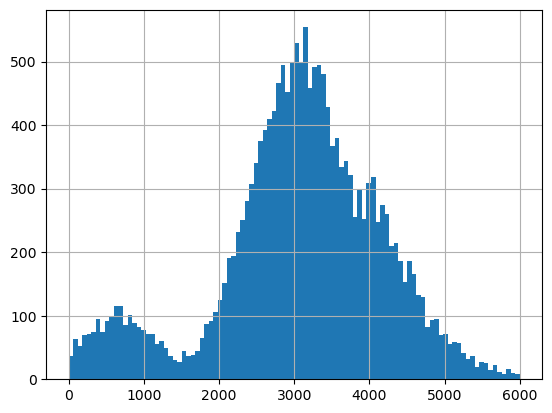

In [35]:

df_rides_go['distance'].hist(bins=100, range=(0, 6000));

**duration**

18022

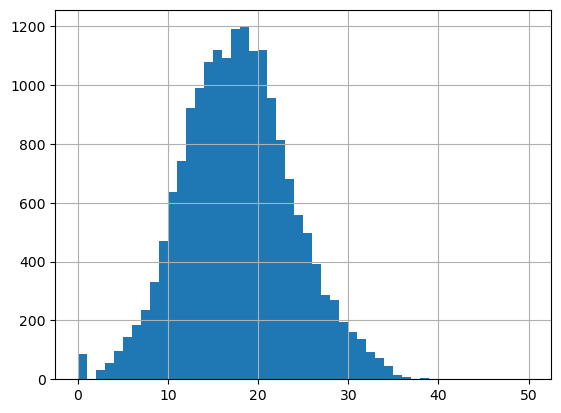

In [36]:
duration_old_count = (df_rides_go['duration'].count())
df_rides_go['duration'].hist(bins=50, range=(0, 50));
duration_old_count

Имеет смысл удалить из датафрейма значения с нулевыми или близкими к нулю данными. На данном графике имеет смысл удаление сессий более 35 мин.

In [37]:
len(df_rides_go.query('duration <= 1'))

85

In [38]:
len(df_rides_go.query('duration > 35'))

28

In [39]:
df_rides_go = df_rides_go.loc[df_rides_go['duration'] >= 1]
df_rides_go = df_rides_go.loc[df_rides_go['duration'] <= 35]

In [40]:
duration_new_count = (df_rides_go['duration'].count())
duration_new_count 

17909

In [41]:
dropped_duration_count = ((duration_old_count - duration_new_count) / duration_old_count) * 100
print(f'Процент отброшенных данных: {dropped_distance_count:.2f}% ')

Процент отброшенных данных: 0.25% 


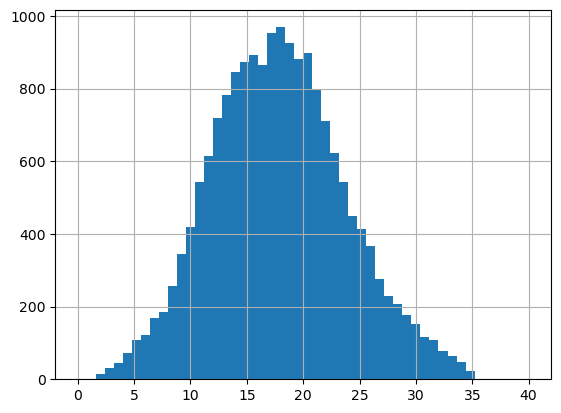

In [42]:
df_rides_go['duration'].hist(bins=50, range=(0, 40));

In [43]:
df_subscriptions_go.head(15)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Рассмотрим данные в датафрейме df_subscriptions_go.

В данном датафрейме отсутствуют аномальные значения

#### Вывод:

В датафрейме df_users_go, df_subscriptions_go аномальных значений выявлено не было.

В датафрейме df_rides_go было отброшено некоторое количество мусорных данных в колонках distance и duration

### Вывод: Предобработка данных

Для проверки того, что при предобработке данных отброшен допустимый процент данных, сравним количество строк в DataFrame до обработки (initial_row_count) и после обработки (final_row_count), вычислив долю удалённых данных.

In [44]:
#  Количество строк после обработки
final_row_count_df_users_go = df_users_go.shape[0]
print(f'Количество строк после обработки таблицы users_go: {final_row_count_df_users_go}')

final_row_count_df_rides_go = df_rides_go.shape[0]
print(f'Количество строк после обработки таблицы rides_go: {final_row_count_df_rides_go}')

final_row_count_df_subscriptions_go = df_subscriptions_go.shape[0]
print(f'Количество строк после обработки таблицы subscriptions_go: {final_row_count_df_subscriptions_go}')

Количество строк после обработки таблицы users_go: 1534
Количество строк после обработки таблицы rides_go: 17909
Количество строк после обработки таблицы subscriptions_go: 2


Вычисляем процент отброшенных данных

In [45]:
# Процент отброшенных данных
dropped_percentage_df_users_go = ((initial_row_count_df_users_go - final_row_count_df_users_go) / initial_row_count_df_users_go) * 100
print(f"Процент отброшенных данных df_users_go: {dropped_percentage_df_users_go:.2f}%")

dropped_percentage_df_rides_go = ((initial_row_count_df_rides_go - final_row_count_df_rides_go) / initial_row_count_df_rides_go) * 100
print(f"Процент отброшенных данных df_rides_go: {dropped_percentage_df_rides_go:.2f}%")

dropped_percentage_df_subscriptions_go = ((initial_row_count_df_subscriptions_go - final_row_count_df_subscriptions_go) / initial_row_count_df_subscriptions_go) * 100
print(f"Процент отброшенных данных df_subscriptions_go: {dropped_percentage_df_subscriptions_go:.2f}%")

Процент отброшенных данных df_users_go: 1.98%
Процент отброшенных данных df_rides_go: 0.88%
Процент отброшенных данных df_subscriptions_go: 0.00%


In [46]:
if dropped_percentage_df_users_go > 5:
    print("Предупреждение: В датафрейме df_users_go, было отброшено больше 10% данных!")
else:
    print("Потери данных в датафрейме df_users_go, находятся в пределах допустимого уровня.")
    
if dropped_percentage_df_rides_go > 5:
    print("Предупреждение: В датафрейме df_rides_go, было отброшено больше 10% данных!")
else:
    print("Потери данных в датафрейме df_rides_go, находятся в пределах допустимого уровня.")

if dropped_percentage_df_subscriptions_go > 5:
    print("Предупреждение: В датафрейме df_subscriptions_go, было отброшено больше 10% данных!")
else:
    print("Потери данных в датафрейме df_subscriptions_go, находятся в пределах допустимого уровня.")

Потери данных в датафрейме df_users_go, находятся в пределах допустимого уровня.
Потери данных в датафрейме df_rides_go, находятся в пределах допустимого уровня.
Потери данных в датафрейме df_subscriptions_go, находятся в пределах допустимого уровня.


Мы выполнили предобработку данных. Выявили в датафрейме пропущенные значения и заполнили их там где это представляется возможным, не исказив данные. Исправили типы данных на подходящие. Обработали аномальные значения. Обработали дубликаты. Итого было отброшено не более 5% мусорных данных.

Нам удалось сохранить большую часть датафрейма, графики стали заметно лучше.

## Этап 3. Исследовательский анализ данных

### Частота встречаемости городов у пользователей

Опишем и визуализируем информацию о встречаемости городов у пользователей.

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


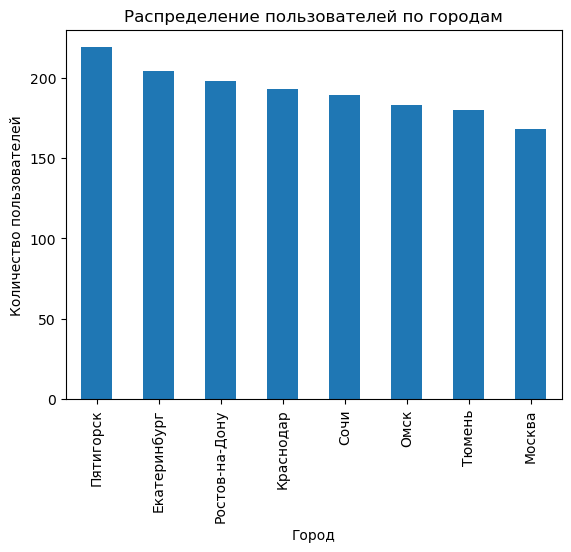

In [47]:
city_frequency = df_users_go['city'].value_counts()
print(city_frequency)
df_users_go['city'].value_counts().plot(kind = 'bar')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по городам')
plt.show()

Больше всего клиентов зарегестрированно в городе Пятигорск, а меньше всего в Москве.

### Соотношение пользователей с подпиской и без подписки

Опишем и визуализируем информацию о соотношении пользователей с подпиской и без подписки.

                   user_id  percentage
subscription_type                     
free                   835       54.43
ultra                  699       45.57


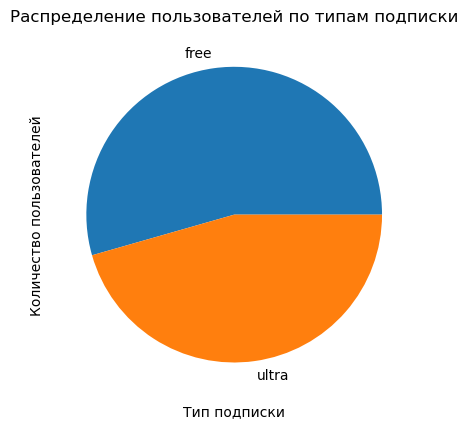

In [48]:
#subscription_frequency = df_users_go['subscription_type'].value_counts()
subscription_frequency = df_users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

total_subscriptions = subscription_frequency['user_id'].sum()
subscription_frequency['percentage'] = round((subscription_frequency['user_id'] / total_subscriptions) * 100, 2)

print(subscription_frequency)

subscription_frequency['percentage'].plot(kind='pie')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по типам подписки')
plt.show()

Соотношении пользователей с подпиской и без подписки близкое. Пользователей без подписки (free) - 54.43%. Пользователей с подпиской (ultra) - 45.57%

### Соотношение пользователей по возрастам

Опишем и визуализируем информацию о соотношении пользователей по возрастам.

In [49]:
# Выводим статистические показатели
print(df_users_go['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Категоризируем данные по группам возрастов.

In [50]:
def age_category_func(row):
    age_type = row['age']
    if age_type <= 17:
        return 'школьный возраст'
    elif 18 <= age_type <= 35:
        return 'молодость'
    elif 36 <= age_type <= 60:
        return 'зрелость'
    else:
        return 'старость'
df_users_go['age_category'] = df_users_go.apply(age_category_func, axis=1)
df_users_go.head(20)

,user_id,name,age,city,subscription_type,age_category
0,1,Кира,22,Тюмень,ultra,молодость
1,2,Станислав,31,Омск,ultra,молодость
2,3,Алексей,20,Москва,ultra,молодость
3,4,Константин,26,Ростов-на-Дону,ultra,молодость
4,5,Адель,28,Омск,ultra,молодость
5,6,Регина,25,Краснодар,ultra,молодость
6,7,Игорь,23,Омск,ultra,молодость
7,8,Юрий,23,Краснодар,ultra,молодость
8,9,Ян,21,Пятигорск,ultra,молодость
9,10,Валерий,18,Екатеринбург,ultra,молодость


                  user_id  percentage
age_category                         
зрелость               13        0.85
молодость            1442       94.00
школьный возраст       79        5.15


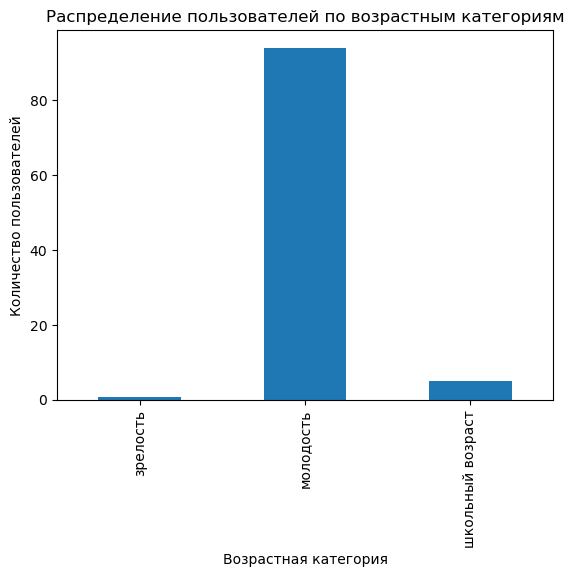

In [51]:
age_frequency = df_users_go.pivot_table(index='age_category', values='user_id', aggfunc='count')

total_age_frequency = age_frequency['user_id'].sum()
age_frequency['percentage'] = round((age_frequency['user_id'] / total_age_frequency) * 100, 2)

print(age_frequency)

age_frequency['percentage'].plot(kind='bar')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрастным категориям')
plt.show()

Согласно полученных данных видим, что основная категория клиенотов это группа людей в возрасте от 18 до 35 лет включительно (Молодость), составляет 94%.
Группа людей в возрасте до 17 лет включительно (школьники), составляет 5.15%.
Группа людей в возрасте от 36 до 60 лет включительно (зрелые), составляет всего-лишь 0.85%.


###  Расстояние, которое пользователь преодолел за одну поездку

Опишем и визуализируем информацию расстояния, которое пользователь преодолел за одну поездку.

           distance
count   1534.000000
mean   35623.300409
std    12859.511317
min     5530.344048
25%    26228.300558
50%    35146.755425
75%    44104.374648
max    79325.846482


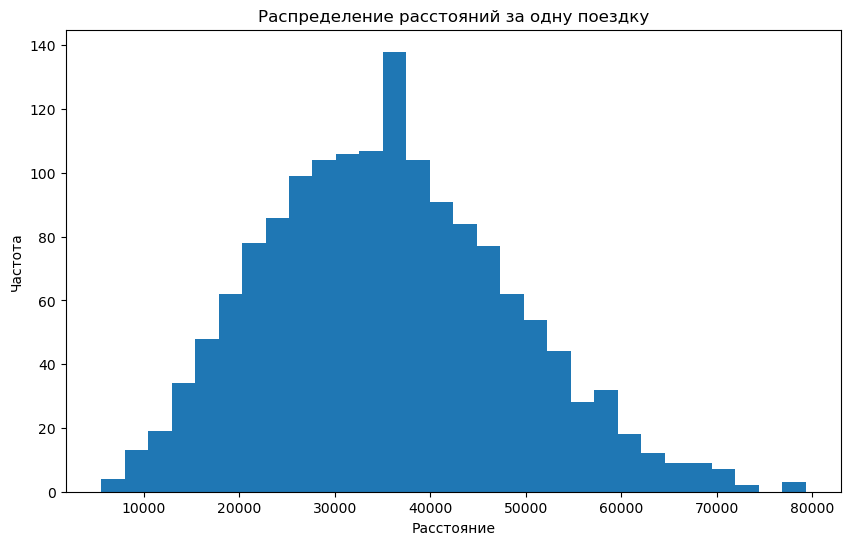

In [52]:
# Создаем сводную таблицу суммарных расстояний по каждому пользователю
tripDistance = df_rides_go.pivot_table(index='user_id', values='distance', aggfunc='sum')

# Описываем статистическое расстояние
statistics_Distance = tripDistance.describe()

# Выводим статистические показатели
print(statistics_Distance)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(tripDistance['distance'], bins=30)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Пользователи в среднем преодолевают расстояние около 35623 метров, с разбросом данных от 5530 до 79325 метров.

###  Продолжительность поездок

Опишем и визуализируем информацию продолжительностя поездки.

          duration
count  1534.000000
mean    208.423939
std      73.566787
min      34.157765
25%     155.811534
50%     204.056202
75%     257.680940
max     446.233013


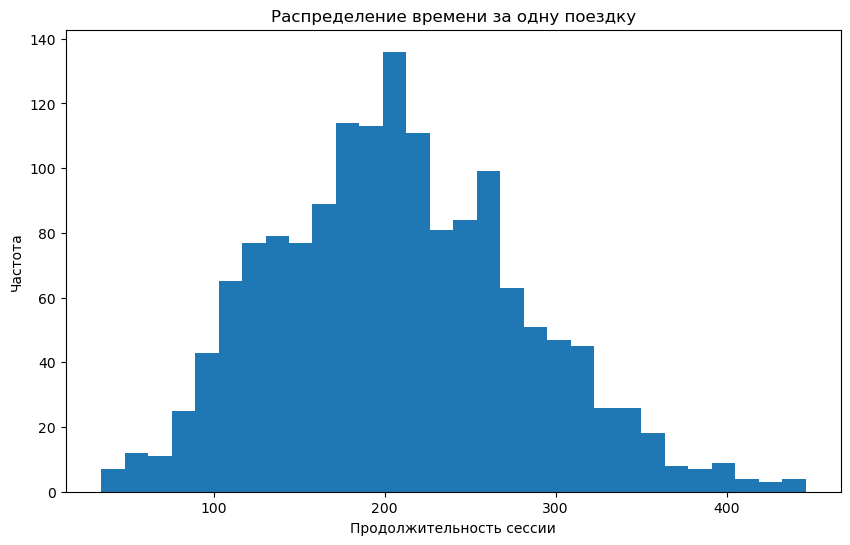

In [53]:
# Создаем сводную таблицу продолжительности поездок по каждому пользователю
tripDuratione = df_rides_go.pivot_table(index='user_id', values='duration', aggfunc='sum')

# Описываем статистическое расстояние
statistics_Duratione = tripDuratione.describe()

# Выводим статистические показатели
print(statistics_Duratione)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(tripDuratione['duration'], bins=30)
plt.title('Распределение времени за одну поездку')
plt.xlabel('Продолжительность сессии')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Пользователи в среднем трятят около 208 мин. за одну поездку, с разбросом данных от 34 до 446 мин.

## Этап 4. Объединение данных

###  Объединеним данные о пользователях, поездках и подписках в один датафрейм

In [54]:
# Объединение данных пользователей и подписок по столбцу user_id
df_users_rides = df_users_go.merge(df_rides_go, on='user_id', how='left')

# Объединение полученной таблицы с данными о поездках по столбцу subscription_type
df_combined = df_users_rides.merge(df_subscriptions_go, on='subscription_type', how='left')

# Просмотр объединённого датафрейма
df_combined.head()


,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,молодость,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,молодость,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,молодость,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,молодость,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,молодость,4028.687306,26.265803,2021-08-28,8,6,0,199


###  Создадим еще два датафрейма: с данными о пользователях с подпиской/без подписки

Создадим датафрейм с данными о пользователях без подписки.

In [55]:
df_combined_without_subscriptions = df_combined.loc[df_combined['subscription_type']=='free']
df_combined_without_subscriptions

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
6472,700,Айдар,22,Омск,free,молодость,2515.690719,14.944286,2021-01-02,1,8,50,0
6473,700,Айдар,22,Омск,free,молодость,846.932642,16.234663,2021-02-01,2,8,50,0
6474,700,Айдар,22,Омск,free,молодость,4004.434142,20.016628,2021-02-04,2,8,50,0
6475,700,Айдар,22,Омск,free,молодость,1205.911290,9.782872,2021-02-10,2,8,50,0
6476,700,Айдар,22,Омск,free,молодость,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17904,1534,Альберт,25,Краснодар,free,молодость,3781.098080,19.822962,2021-11-04,11,8,50,0
17905,1534,Альберт,25,Краснодар,free,молодость,2840.423057,21.409799,2021-11-16,11,8,50,0
17906,1534,Альберт,25,Краснодар,free,молодость,3826.185507,18.435051,2021-11-18,11,8,50,0
17907,1534,Альберт,25,Краснодар,free,молодость,2902.308661,16.674362,2021-11-27,11,8,50,0


Создадим датафрейм с данными о пользователях с подпиской.

In [56]:
df_combined_with_subscriptions = df_combined.loc[df_combined['subscription_type']=='ultra']
df_combined_with_subscriptions

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,молодость,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,молодость,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,молодость,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,молодость,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,молодость,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,699,Оксана,22,Москва,ultra,молодость,3973.046497,24.671163,2021-08-29,8,6,0,199
6468,699,Оксана,22,Москва,ultra,молодость,3288.702563,15.892886,2021-09-12,9,6,0,199
6469,699,Оксана,22,Москва,ultra,молодость,3076.159348,14.389525,2021-09-26,9,6,0,199
6470,699,Оксана,22,Москва,ultra,молодость,4707.845501,15.839579,2021-10-17,10,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

Визуализируем информацию расстояния, которое пользователь преодолел в датафрейме с данными о пользователях без подписки.

count    11437.000000
mean      3018.161640
std       1223.885890
min          0.855683
25%       2358.760616
50%       3098.793599
75%       3876.753305
max       5991.817697
Name: distance, dtype: float64


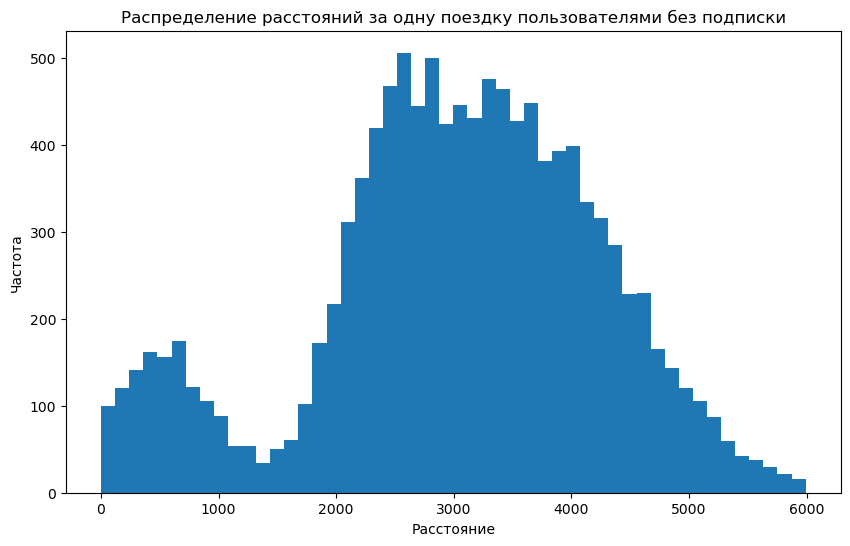

In [57]:
# Описываем статистическое расстояние
statistics_Distance_without_subscriptions = df_combined_without_subscriptions['distance'].describe()

# Выводим статистические показатели
print(statistics_Distance_without_subscriptions)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df_combined_without_subscriptions['distance'], bins=50)
plt.title('Распределение расстояний за одну поездку пользователями без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Визуализируем информацию о времени, которое пользователь потратил в датафрейме с данными о пользователях без подписки.

count    11437.000000
mean        17.506750
std          6.151730
min          2.035632
25%         13.075511
50%         17.359904
75%         21.616221
max         34.948498
Name: duration, dtype: float64


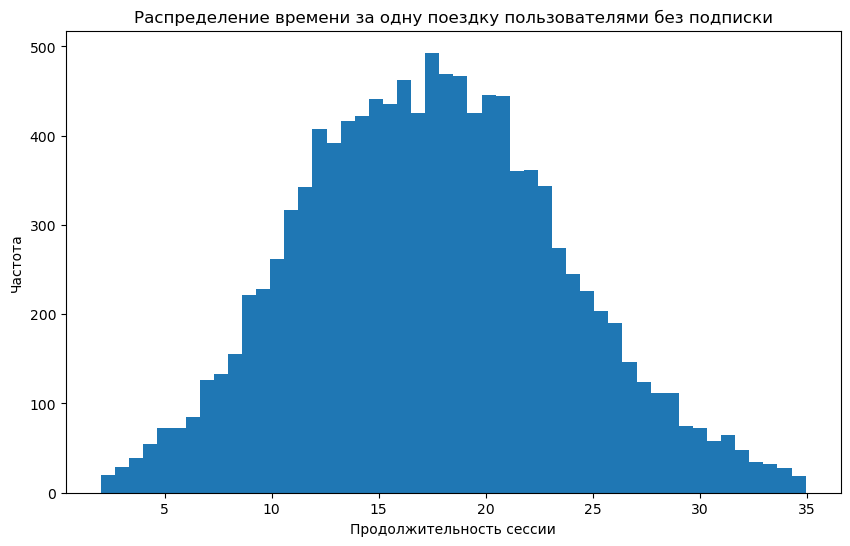

In [58]:
# Описываем статистическое расстояние
statistics_Duration_without_subscriptions = df_combined_without_subscriptions['duration'].describe()

# Выводим статистические показатели
print(statistics_Duration_without_subscriptions)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df_combined_without_subscriptions['duration'], bins=50)
plt.title('Распределение времени за одну поездку пользователями без подписки')
plt.xlabel('Продолжительность сессии')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Визуализируем информацию расстояния, которое пользователь преодолел в датафрейме с данными о пользователях с подпиской.

count    6472.000000
mean     3109.924003
std       834.192663
min       244.210438
25%      2783.631172
50%      3146.443549
75%      3554.677507
max      5699.769662
Name: distance, dtype: float64


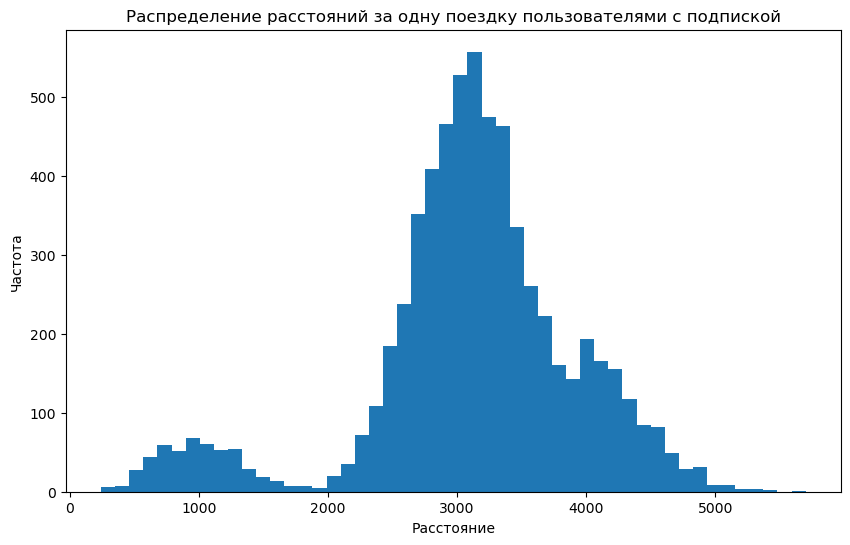

In [59]:
# Описываем статистическое расстояние
statistics_Distance_with_subscriptions = df_combined_with_subscriptions['distance'].describe()

# Выводим статистические показатели
print(statistics_Distance_with_subscriptions)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df_combined_with_subscriptions['distance'], bins=50)
plt.title('Распределение расстояний за одну поездку пользователями с подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Визуализируем информацию о времени, которое пользователь потратил в датафрейме с данными о пользователях с подпиской.

count    6472.000000
mean       18.463786
std         5.454592
min         3.760353
25%        14.504902
50%        18.154184
75%        21.823901
max        34.962659
Name: duration, dtype: float64


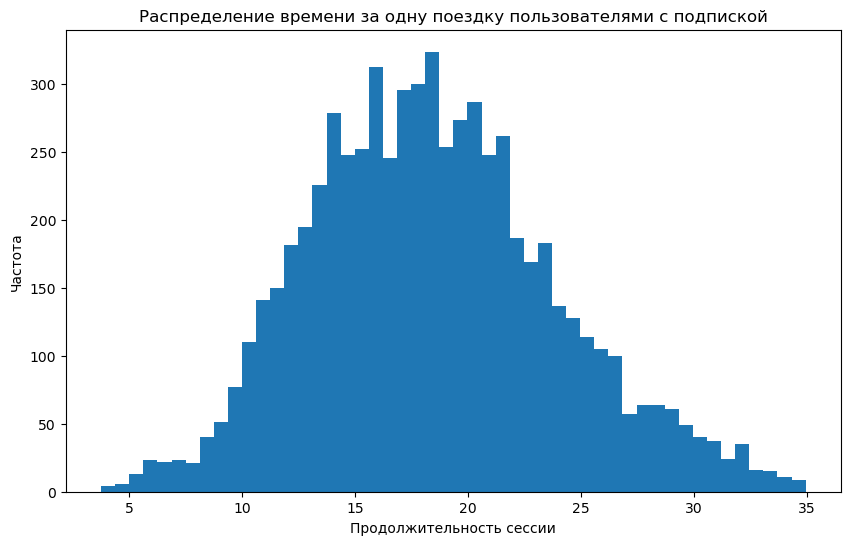

In [60]:
# Описываем статистическое расстояние
statistics_Duration_with_subscriptions = df_combined_with_subscriptions['duration'].describe()

# Выводим статистические показатели
print(statistics_Duration_with_subscriptions)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df_combined_with_subscriptions['duration'], bins=50)
plt.title('Распределение времени за одну поездку пользователями с подпиской')
plt.xlabel('Продолжительность сессии')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

### Вывод: объединение данных

**Расстояние поездок:**

Для пользователей без подписки среднее расстояние поездки составляет около 3018 м. с стандартным отклонением 1223 м. Большинство поездок находится в промежутке, примерно, от 1800 м. до 4200 м.

Для пользователей с подпиской среднее расстояние поездки составляет около 3109 м. со стандартным отклонением 834 м. Большинство поездок находится в промежутке, примерно, от 2300 м. до 3900 м. Пользователи с подпиской более концентрированы вокруг среднего значения, в отличие от пользователей без подписки, у которых расстояния варьируются шире.


**Время поездок:**

Для пользователей без подписки среднее время поездки составляет около 17.5 мин. с стандартным отклонением 6.15 мин. Большинство поездок для этих пользователей длится, примерно, от 11 до 24 мин.

Для пользователей с подпиской среднее время поездки составляет около 18.4 мин. со стандартным отклонением 5.45 мин. Таким образом, большинство поездок для этих пользователей длится, примерно, от 13 до 24 минут. Пользователи с подпиской более концентрированы вокруг среднего значения, в отличие от пользователей без подписки, у которых время варьируются шире.

**Выводы:** Подписчики сервиса 'GoFast' в среднем делают более длинные поездки как по времени, так и по расстоянию, чем пользователи без подписки. Однако, их поездки обычно более стабильны и предсказуемы, в то время как у пользователей без подписки больший разброс по параметрам. Это может быть связано с тем, что подписчики чаще используют сервис и имеют более устоявшиеся маршруты.

## Этап 5. Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Создадим новый датафейм agriagte_data, куда положим агрегированные данные о поездках, а именно:

суммарное расстояние,
количество поездок,
суммарное время
для каждого пользователя за каждый месяц.

In [61]:
df_combined.head()

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,молодость,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,молодость,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,молодость,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,молодость,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,молодость,4028.687306,26.265803,2021-08-28,8,6,0,199


In [62]:
# Создание сводной таблицы
agrigate_data = df_combined.pivot_table(index = ['user_id', 'month_date', 'subscription_type'], 
                              values = ['distance', 'duration'], 
                              aggfunc = {'distance':'sum','duration':'sum','user_id':'count'})

# Переименование колонок
agrigate_data = agrigate_data.rename(columns = {'distance':'distance','duration':'duration', 'user_id':'times'})
# Округление продолжительности
agrigate_data['duration'] = np.ceil(agrigate_data['duration']) 
# Сброс индексов
agrigate_data = agrigate_data.reset_index()
agrigate_data

,user_id,month_date,subscription_type,distance,duration,times
0,1,1,ultra,7027.511294,42.0,2
1,1,4,ultra,754.159807,7.0,1
2,1,8,ultra,6723.470560,45.0,2
3,1,10,ultra,5809.911100,32.0,2
4,1,11,ultra,7003.499363,54.0,3
...,...,...,...,...,...,...
11270,1534,6,free,3409.468534,25.0,2
11271,1534,8,free,7622.453034,48.0,2
11272,1534,9,free,4928.173852,23.0,1
11273,1534,11,free,13350.015305,77.0,4


В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [63]:
def payment_func(subscription_type, duration, times, month_date):
    result = 0
    if subscription_type == 'free':
        pay_for_start = 50
        pay_of_one_minute=8
        result = pay_for_start * times + pay_of_one_minute * duration
    else:
        pay_of_one_minute=6
        pay_subscription = 199
        result = pay_subscription + pay_of_one_minute * duration
    return result
agrigate_data['payment'] = agrigate_data.apply(lambda row: payment_func(row['subscription_type'], row['duration'], row['times'], row['month_date']), axis=1)
agrigate_data.head(20)

,user_id,month_date,subscription_type,distance,duration,times,payment
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,45.0,2,469.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,54.0,3,523.0
5,1,12,ultra,6751.629942,28.0,2,367.0
6,2,3,ultra,10187.723006,61.0,3,565.0
7,2,4,ultra,6164.381824,40.0,2,439.0
8,2,6,ultra,3255.338202,14.0,1,283.0
9,2,7,ultra,6780.722964,47.0,2,481.0


In [64]:
total_amount = agrigate_data['payment'].sum()
print(f'Общая сумма выручки составляет: {total_amount} руб.')

Общая сумма выручки составляет: 3830544.0 руб.


In [65]:
# Общая сумма выручки бесплатной подписки
total_amount_free = agrigate_data.loc[agrigate_data['subscription_type'] == 'free']['payment'].sum()
# Общая сумма выручки платной подписки
total_amount_ultra = agrigate_data.loc[agrigate_data['subscription_type'] == 'ultra']['payment'].sum()
print(f'Общая сумма выручки бесплатной подписки составляет: {total_amount_free} руб.')
print(f'Общая сумма выручки платной подписки составляет: {total_amount_ultra} руб.')

Общая сумма выручки бесплатной подписки составляет: 2200714.0 руб.
Общая сумма выручки платной подписки составляет: 1629830.0 руб.


### Вывод: подсчёт выручки

На данном этапе мы с агрегировали данные в единый датафрейм (agrigate_data), где нашли суммарное пройденное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Далее мы посчитали помесячную выручку, которую принёс каждый пользователь.
Столбец с помесячной выручкой (payment) учитывет стоимость старта поездки, стоимость времени поездки и подписочную плату.
Добавление столбца с помесячной выручкой позволило нам расчитать:

Общую сумму выручки бесплатной подписки, которая составляет: 2200714.0 руб.

Общая сумма выручки платной подписки, которая составляет: 1629830.0 руб.

Общая сумма выручки составляет: 3830544.0 руб.


## Этап 6. Проверка гипотез

### Гипотеза №1. Пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи без подписки.

Нам даны две генераные совокупности, длительность поездок пользователей с подпиской и без (df_combined_with_subscriptions['duration'], df_combined_without_subscriptions['duration']). 

Число наблюдений в генеральной совокупности пользователи с подпиской равна: df_combined_with_subscriptions['duration'] = 6472


Число наблюдений в генеральной совокупности пользователи без подпиской равна: df_combined_without_subscriptions['duration'] = 11437


**Цель:** Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**H0 (нулевая гипотеза):** Среднее время поездок пользователей с подпиской не отличается от времени поездок пользователей без подписки.

**H1 (альтернативная гипотеза):** Среднее время поездок пользователей с подпиской больше, чем у пользователей без подписки.

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** Односторонний t-тест для независимых выборок. Этот тест подходит, так как сравниваются два набора данных, которые являются независимыми.

**Условия проведения t-теста:**

• Генеральные совокупности не зависят друг от друга - удовлетворяет.
    
• Выборочные средние нормально распределены - удовлетворяет (согласно ЦПТ, выборочные средние нормально распределены, так как размер выборок достаточно большой)
    
• Дисперсии рассматриваемых генеральных совокупностей равны - удовлетворяет

In [66]:
# Длительности поездок пользователей с подпиской и без
duration_with_subscription = df_combined_with_subscriptions['duration']
duration_without_subscription = df_combined_without_subscriptions['duration']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(duration_with_subscription, duration_without_subscription, alternative='greater')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Сравнение p-значения с уровнем значимости alpha
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Пользователи с подпиской не тратят больше времени на поездки.")

T-статистика: 10.411944775600045
P-значение: 1.2915445747855376e-25
Мы отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.


**Интерпретация результатов:**

• T-статистика показывает, насколько сильно отличаются средние значения двух групп.
    
• P-значение — это вероятность того, что мы получили такой результат случайно, при условии, что нулевая гипотеза верна. Если p-значение меньше 0.05, то различие между средними значениями считается статистически значимым.

На основании результатов t-теста, можно сделать вывод о том, выгоднее пользователи с подпиской для компании.

###  Гипотеза №2. Пользователи в среднее проезжают расстояние меньше 3130 метров.

Нам дана одна генеральная совокупность, расстояние, которое пользователи с подпиской проезжают за одну поездку (df_combined_with_subscriptions['distance']). 

Число наблюдений в генеральной совокупности равна: df_combined_with_subscriptions['distance'] = 6472.

**Цель:** Важно понять, проезжают ли пользователи с подпиской в среднем меньше 3130 метров. Это расстояние является оптимальным с точки зрения износа самоката? Если да, то пользователи с подпиской не вносят дополнительные затраты связанные с ускоренным износом самокатов.

**Нулевая гипотеза (H0):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (то есть среднее расстояние ≤ 3130).

**Альтернативная гипотеза (H1):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров (то есть среднее расстояние > 3130).

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** Односторонний t-тест для одной выборки.

In [67]:
# Данные: расстояние поездок для пользователей с подпиской
distance_with_subscription = df_combined_with_subscriptions['distance']

# Задаем среднее расстояние, с которым сравниваем
mean_distance = 3130

# Проведение одностороннего t-теста
t_stat, p_value = stats.ttest_1samp(distance_with_subscription, mean_distance, alternative='greater')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Сравнение p-значения с уровнем значимости alpha
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Среднее расстояние превышает 3130 метров.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Среднее расстояние не превышает 3130 метров.")

T-статистика: -1.9361098985789802
P-значение: 0.9735511313272887
Мы не можем отвергнуть нулевую гипотезу. Среднее расстояние не превышает 3130 метров.


**Интерпретация результатов:**

• T-статистика показывает отклонение выборочного среднего от заданного значения (3130 метров).
    
• P-значение — это вероятность того, что такое или большее отклонение могло произойти случайно, при условии, что нулевая гипотеза верна. Если p-значение меньше 0.05, то мы отвергаем нулевую гипотезу.


**Вывод:**

T-статистика составила -1.93, а p-значение равна 0.973. Учитывая уровень значимости alpha = 0.05, у нас нет оснований (нет достаточных данных) отвергать нулевую гипотезу о том, что среднее расстояние, пройденное пользователями с подпиской за одну поездку, равно 3130 метров.

Таким образом, на основе проведенного теста **мы не можем утверждать, что пользователи за одну поездку в среднее проезжают расстояние меньше 3130 метров.**

### Гипотеза №3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Нам даны две генеральные совокупности, помесячная выручка от пользователей с подпиской и без (df_aggregated.query('subscription_type == "ultra"')['income'], df_aggregated.query('subscription_type == "free"')['income']). Число наблюдений в генеральной совокупности пользователи с подпиской равна 4533 и оно меньше приблизительно в полтора раза, чем число наблюдений в генеральной совокупности пользователи без подписки (6767 наблюдений).

**Цель:** Важно понять, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**Нулевая гипотеза (H0):** Помесячная выручка от пользователей с подпиской не выше, чем от пользователей без подписки (то есть средняя выручка от пользователей с подпиской ≤ средней выручки от пользователей без подписки).

**Альтернативная гипотеза (H1):** Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки (то есть средняя выручка от пользователей с подпиской > средней выручки от пользователей без подписки).

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** Односторонний t-тест для двух независимых выборок.

In [68]:
# Выделение данных по выручке для каждой группы пользователей
revenue_with_subscription = agrigate_data.query('subscription_type == "ultra"')['payment']
revenue_without_subscription = agrigate_data.query('subscription_type == "free"')['payment']

# Проведение одностороннего t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(revenue_with_subscription, revenue_without_subscription, alternative='greater')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Сравнение p-значения с уровнем значимости alpha
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Выручка от пользователей с подпиской выше.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Выручка от пользователей с подпиской не выше.")


T-статистика: 12.146089093160509
P-значение: 4.886691370276142e-34
Мы отвергаем нулевую гипотезу. Выручка от пользователей с подпиской выше.


**Интерпретация результатов:**

• T-статистика показывает степень отклонения разницы средних от нуля.
    
• P-значение — вероятность того, что разница в выручке могла возникнуть случайно. Если p-значение меньше 0.05, это говорит о том, что разница статистически значима.

**Вывод:**

Заключение по результатам t-теста:

Полученные результаты t-теста свидетельствуют о статистической значимости различий между помесячной выручки от пользователей с подпиской и без подписки.

T-статистика составила 12.14 (в общем случае, чем больше значение T-статистики, тем более вероятно, что различия между выборками не случайны), а p-значение оказалось весьма малым (порядка 4.88e-34). Учитывая уровень значимости alpha = 0.05, мы отвергаем нулевую гипотезу о том, что средние значения помесячной выручки для обеих групп пользователей одинаковы.

Таким образом, у нас есть статистические доказательства того, что помесячная выручка от пользователей с подпиской в среднем выше, чем от пользователей без подписки. Это подтверждает исходную гипотезу.

### Гипотеза №4. Количество обращений в техподдержку значимо снизилось после технического обновления на стороне сервера приложения

**Условие задачи:** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нам дана одна генеральная совокупность, которая состоит из двух для зависимых (парных) выборок (количество обращений в техподдержку до технического обновления сервера приложения и после обновления). Число наблюдений для зависимых (парных) выборок одинаково.

**Цель:** Важно понять, снизиться ли количество обращений в техподдержку после технического обновления на стороне сервера приложения.

**Нулевая гипотеза (H0):** Средние значения количества обращений до и после обновления серверов равны.

**Альтернативная гипотеза (H1):** Среднее количество обращений после обновления серверов меньше, чем до обновления.

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** парный t-тест, так как у нас есть два связанных набора данных, количество обращений до и после обновления для каждого пользователя.

**Критерий оценки:** Если p-значение, полученное в результате t-теста, будет меньше уровня значимости (alpha), то нулевая гипотеза будет отвергнута в пользу альтернативной, и мы сможем утверждать, что есть статистически значимое различие в количестве обращений до и после обращения.

Для проведения парного t-теста используем метода для сравнения средних значений двух связанных выборок ttest_rel из библиотеки scipy.stats, при этом передадим этому методу два параметра: выброку до проведения обновления и после. Вот пример кода для проведения теста stats.ttest_rel(before, after)

**ВЫВОД:** Для проверки гипотезы о том,что количество обращений в техподдержку значимо снизилось после технического обновления на стороне сервера приложения необходимо использовать **тест на равенство средних для зависимых выборок, до и после изменений (t-тест для зависимых выборок stats.ttest_rel())**

### Вывод: Проверка гипотез

**Гипотеза №1**
Пользователи с подпиской тратят больше времени на поездки.


**Гипотеза №2**
Пользователи за одну поездку в среднем проезжают расстояние меньше 3130 метров.


**Гипотеза №3**
Помесячная выручка от пользователей с подпиской в среднем выше, чем от пользователей без подписки.

**Гипотеза №4**
Количество обращений в техподдержку значимо снизилось после технического обновления на стороне сервера приложения.

**Итог:** Учет результатов проведенных тестов позволяет сделать вывод о том, что пользователи с подпиской более активны, тратят больше времени на поездки, приносят больше выручки. 

## Общий Вывод

**1. Загрузка и первичный обзор данных:**

Типы данных в датасетах df_users_go, df_rides_go, и df_subscriptions_go успешно определены.
Уникальный идентификатор пользователя user_id общий для данных о пользователях и поездках, что упрощает объединение датасетов.
Пропущенных значений в данных не обнаружено.
Данные о подписках содержат два типа: "free" и "ultra".

**2. Предобработка данных:**

Выявили в датафрейме пропущенные значения и заполнили их там где это представляется возможным, не исказив данные. Исправили типы данных на подходящие. Обработали аномальные значения. Обработали дубликаты. Итого было отброшено не более 5% мусорных данных.

**3. Исследовательский анализ данных:**

Выявили, что больше всего клиентов зарегестрированно в городе Пятигорск, а меньше всего в Москве. Соотношении пользователей с подпиской и без подписки близкое. Пользователей без подписки (free) - 54.43%. Пользователей с подпиской (ultra) - 45.57%. Согласно полученных данных видим, что основная категория клиенотов это группа людей в возрасте от 18 до 35 лет включительно (Молодость), составляет 94%. Группа людей в возрасте до 17 лет включительно (школьники), составляет 5.15%. Группа людей в возрасте от 36 до 60 лет включительно (зрелые), составляет всего-лишь 0.85%. Пользователи в среднем преодолевают расстояние около 35623 метров, с разбросом данных от 5530 до 79325 метров.

**4. Объединение данных:**

Подписчики сервиса 'GoFast' в среднем делают более длинные поездки как по времени, так и по расстоянию, чем пользователи без подписки. Однако, их поездки обычно более стабильны и предсказуемы, в то время как у пользователей без подписки больший разброс по параметрам. Это может быть связано с тем, что подписчики чаще используют сервис и имеют более устоявшиеся маршруты.

**5. Подсчёт выручки:**

Мы с агрегировали данные в единый датафрейм (agrigate_data), где нашли суммарное пройденное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Далее мы посчитали помесячную выручку, которую принёс каждый пользователь.
Столбец с помесячной выручкой (payment) учитывет стоимость старта поездки, стоимость времени поездки и подписочную плату.
Добавление столбца с помесячной выручкой позволило нам расчитать:

Общую сумму выручки бесплатной подписки, которая составляет: 2200714.0 руб.

Общая сумма выручки платной подписки, которая составляет: 1629830.0 руб.

Общая сумма выручки составляет: 3830544.0 руб.


**6. Проверка гипотез:**

Гипотеза №1: Подтверждена. Пользователи с подпиской тратят в среднем больше времени на поездки, что является положительным для компании.

Гипотеза №2: Результаты одновыборочного t-теста не позволяют отвергнуть нулевую гипотезу, но с уровнем значимости 0.05 можно утверждать, что среднее расстояние пользователей с подпиской равно 3130 метров.

Гипотеза №3: Подтверждена. Помесячная выручка от пользователей с подпиской в среднем выше, что делает эту группу более выгодной для компании.

Гипотеза №4: Для проверки снижения обращений в техподдержку после обновления сервера должен использовался t-тест для зависимых выборок (st.ttest_rel()).

**Итог:**

Пользователи с подпиской более активны и приносят больше выручки.
Стратегия привлечения пользователей с подпиской может быть успешной.